<h2><font color="blue">homework 6</font></h2>

Consider the shhs.txt datset distributed over slack. 

Use linear regression with bmi to predict log(rdi4p + 1). Report the coefficients and a scatterplot with the fitted line.


In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
# Load the csv file and transfer it into data frame. 
# This file was made in R previously.

df = pd.read_csv('shhs1.csv')
df.head(3) # check the first 3 rows of this dataframe

,pptid,waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,...,RestAn2,RestAn3,RestAn4,HTNDerv_s1,shhs1_tcvd,gender,age_s1,smokstat_s1,WASO,bmi_s1
0,4,85.0,0,0,14.0,358.5,2.990033,29.401993,52.325581,15.282393,...,0,0,0,1,0,1,48,0,43.5,20.185185
1,5,76.0,0,0,6.5,477.0,5.675676,68.648651,13.378378,12.297297,...,0,0,0,1,0,0,66,2,100.5,23.309053
2,9,99.0,0,0,20.0,424.0,5.405406,42.389759,33.570412,18.634424,...,0,0,0,1,0,1,69,2,52.5,25.817447


In [4]:
x=df['bmi_s1'] # filter the colomn of 'bmi_s1'
y=df['rdi4p']  # filter the colomn of 'rdi4p'
x=x.array # change series into array
y=y.array
yy=np.log(y+1)

In [19]:
cor=corrcoef(x,yy)[0][1]
sdx=std(x)
sdy=std(yy)

In [22]:
beta1 = cor * sdy / sdx
beta0 = mean(yy)-beta1*mean(x)
print("The intercept of the fitted line is ",beta0)
print("The slope     of the fitted line is ",beta1)

The intercept of the fitted line is  -0.366684661357235
The slope     of the fitted line is  0.07315878228219655


The formula is the same with the one generated in R, which is $log(rdi4p+1)=-0.36668 + 0.07316 * bmi$.

So $rdi4p = e^{-0.36668 + 0.07316 * bmi}-1$.

### The scatter plot is as follows:

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
xmin=min(x)
xmax=max(x)
ymin=beta0+beta1*xmin
ymax=beta0+beta1*xmax

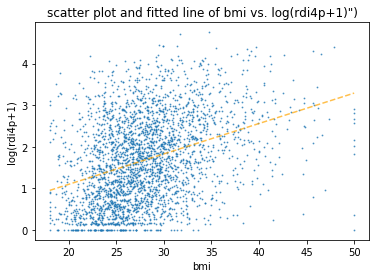

In [71]:
ploty=beta0+beta1*x
plt.scatter(x,yy,s=0.7,alpha=0.7)
plt.plot([xmin,xmax],[ymin,ymax],'--',color="orange",alpha=0.7)
plt.title('scatter plot and fitted line of bmi vs. log(rdi4p+1)")')
plt.xlabel("bmi")
plt.ylabel("log(rdi4p+1)")
plt.show()


Using your formula from the previous question, predict rdi4p for a person with a bmi = 30.

In [29]:
import math
pred_30=math.exp(beta0+beta1*30)-1
print("The predict rdi4p when bmi=30 is ",pred_30)

The predict rdi4p when bmi=30 is  5.221921657009094
